**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 21. Correlated Predictors

_Setup._ Tweak the width and height values below to adjust the size of your plots in this notebook.

In [1]:
options(repr.plot.width=8, repr.plot.height=8)

## What is multicollinearity?

- Roughly speaking: _when predictors are related to each other_

- Formal definition: A set of predictors exhibits __multicollinearity__ when one or more of the predictors is strongly correlated with some linear combination of the other predictors in the set

- Multicollinearity _doesn't always indicate a poor model_, but it can result in some odd behavior

- If two predictors are exactly related (correlation = 1 or -1), then then estimates for $\beta$ are not unique

## Red flags

### Example 1

Suppose we would like to predict the price of a house based on its $\mathit{Size}$ (in square feet) and its $\mathit{Lot}$ size (also in square feet).
The dataset `Houses` in `Stat2Data` contains relevant data for 20 houses sold in 2008 in a small midwestern town.

In [2]:
library(Stat2Data)
data(Houses)
head(Houses)

,Price,Size,Lot
,<int>,<int>,<int>
1,212000,4148,25264
2,230000,2501,11891
3,339000,4374,25351
4,289000,2398,22215
5,160000,2536,9234
6,85000,2368,13329


#### a.
The two-predictor model that predicts $\mathit{Price}$ from $\mathit{Size}$ and $\mathit{Lot}$ is

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Size} + \beta_2 \mathit{Lot} + \varepsilon \qquad \varepsilon \sim \text{iid } N(0, \sigma_{\varepsilon}^2) $$

#### b.
Fit the model in R.

In [3]:
# Solution
fit <- lm(Price ~ Size + Lot, data = Houses)
summary(fit)


Call:
lm(formula = Price ~ Size + Lot, data = Houses)

Residuals:
   Min     1Q Median     3Q    Max 
-79532 -28464   3713  21450  73507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 34121.649  29716.458   1.148   0.2668  
Size           23.232     17.700   1.313   0.2068  
Lot             5.657      3.075   1.839   0.0834 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47400 on 17 degrees of freedom
Multiple R-squared:  0.5571,	Adjusted R-squared:  0.505 
F-statistic: 10.69 on 2 and 17 DF,  p-value: 0.000985


#### c.
Check the diagnostic plots for linearity, equal variance, and normality.

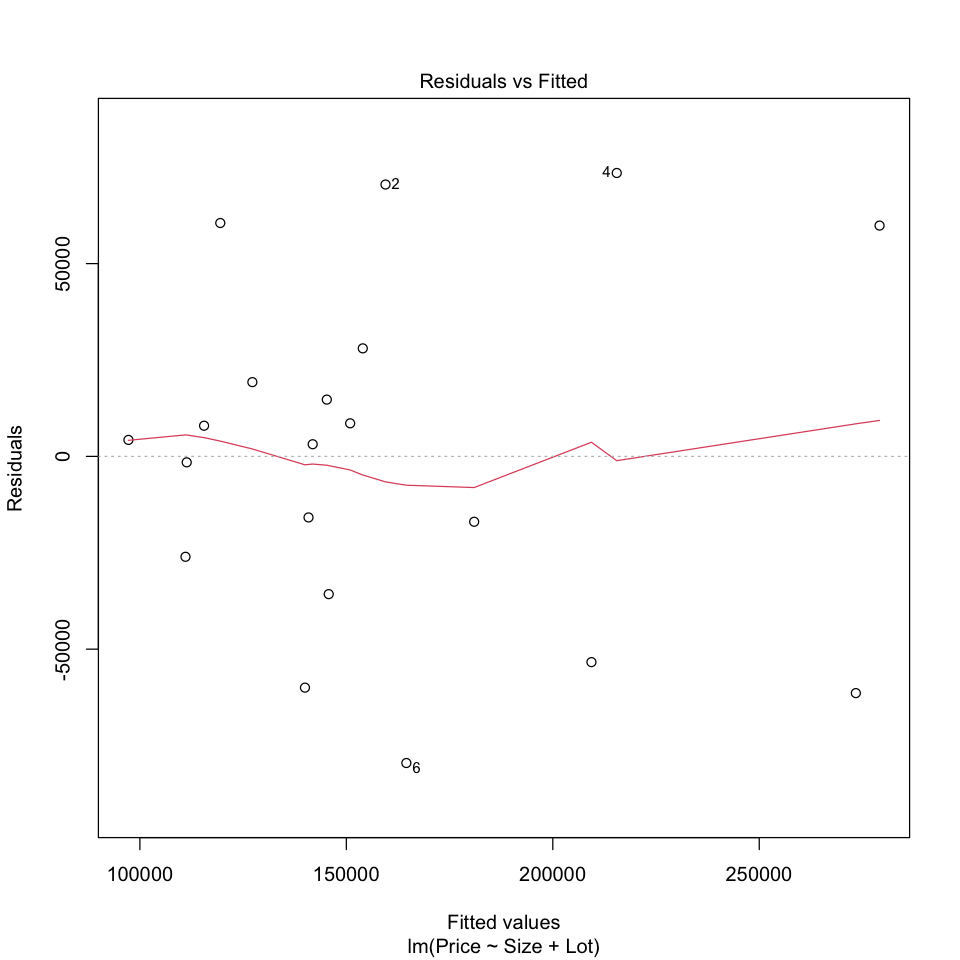

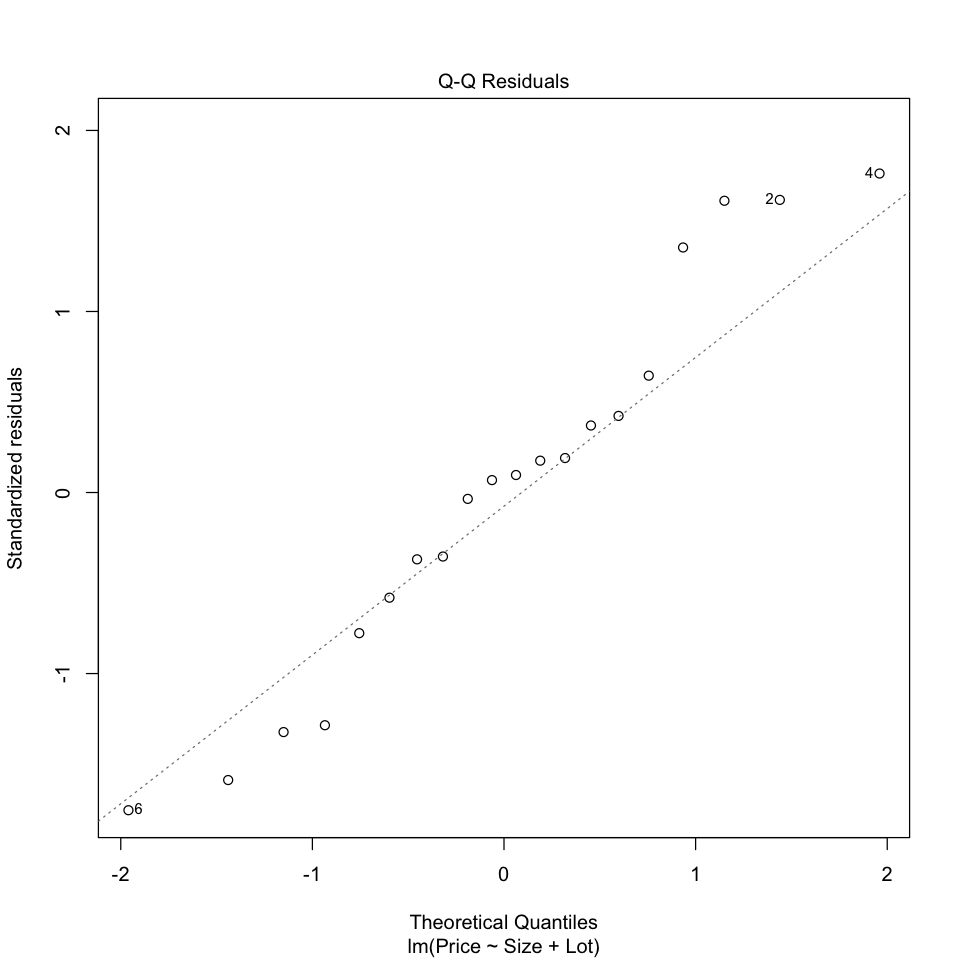

In [4]:
# Solution
plot(fit, which = 1)
plot(fit, which = 2)

*Write your notes here. Double-click to edit.*

*Solution.*

- Linearity. Seems OK. Points in residuals vs. fitted values plot roughly evenly distributed above and below the residuals = 0 line.

- Equal variance. Seems OK. Relatively constant vertical span in residuals vs. fitted values plot.

- Normal Q-Q plot. Seems OK. Plot is an approximately straight line.

#### d.
What's strange about the summary output?

*Write your notes here. Double-click to edit.*

*Solution.*

- ANOVA F-test indicates that overall model is effective ($p$-value = 0.000985), but...

- None of the individual predictors are significant at a level of even 0.05!

<div class="alert alert-danger">
    <h4>Red flag #1 for multicollinearity.</h4>
    The ANOVA F-test says that the model as a whole is effective, but none (or few) of the individual predictors are significant
</div>

- So... what's going on?

    - The individual $t$-tests are testing whether the predictor is helpful _given that the other predictor(s) are in the model_

    - Highly correlated predictors contain similar information, so if one is already in the model, including the other doesn't help significantly

    - We may want to try dropping a predictor and seeing if the resulting model performs similarly

#### e.
Do $\mathit{Size}$ and $\mathit{Lot}$ seem to be "highly" correlated?

In [5]:
# Solution
cor(Houses$Size, Houses$Lot)

[1] 0.7668722

*Write your notes here. Double-click to edit.*

*Solution.* $r = 0.7669$, which is pretty high. This indicates that the two variables contain similar information.

#### f.
Check if $\mathit{Size}$ and/or $\mathit{Lot}$ are significant as __single__ predictors of $\mathit{Price}$.

In [6]:
# Solution
fit.size <- lm(Price ~ Size, data = Houses)
summary(fit.size)


Call:
lm(formula = Price ~ Size, data = Houses)

Residuals:
   Min     1Q Median     3Q    Max 
-93690 -30210   1014  28568 108864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64553.68   26267.76   2.458 0.024362 *  
Size           48.20      12.09   3.987 0.000864 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50440 on 18 degrees of freedom
Multiple R-squared:  0.469,	Adjusted R-squared:  0.4395 
F-statistic:  15.9 on 1 and 18 DF,  p-value: 0.0008643


In [7]:
# Solution
fit.lot <- lm(Price ~ Lot, data = Houses)
summary(fit.lot)


Call:
lm(formula = Price ~ Lot, data = Houses)

Residuals:
   Min     1Q Median     3Q    Max 
-70866 -31082  -3130  19579  89682 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36247.480  30262.135   1.198 0.246537    
Lot             8.752      2.013   4.348 0.000388 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48340 on 18 degrees of freedom
Multiple R-squared:  0.5122,	Adjusted R-squared:  0.4851 
F-statistic:  18.9 on 1 and 18 DF,  p-value: 0.0003878


*Write your notes here. Double-click to edit.*

*Solution.* Both predictors are significant when used on their own.

### Example 2

In a previous lesson, we looked at the `Perch` data, with measurements on 56 perch from a Finnish lake.
We decided that the best model for predicting $\mathit{Weight}$ from $\mathit{Length}$ and $\mathit{Width}$ included both individual predictors and an interaction term.

In [8]:
data(Perch)
head(Perch)

,Obs,Weight,Length,Width
,<int>,<dbl>,<dbl>,<dbl>
1,104,5.9,8.8,1.4
2,105,32.0,14.7,2.0
3,106,40.0,16.0,2.4
4,107,51.5,17.2,2.6
5,108,70.0,18.5,2.9
6,109,100.0,19.2,3.3


#### a.
What kind of association (positive, negative, none) do we expect between each predictor and the response?

*Write your notes here. Double-click to edit.*

*Solution.* We expect a

- positive association between $\mathit{Weight}$ and $\mathit{Length}$;

- positive association between $\mathit{Weight}$ and $\mathit{Width}$.

#### b.
Re-fit this model from a previous lesson:

$$ \mathit{Weight} = \beta_0 + \beta_1 \mathit{Length} + \beta_2 \mathit{Width} + \beta_3 (\mathit{Length} \times \mathit{Width}) + \varepsilon \qquad \varepsilon \sim \text{iid } N(0, \sigma_{\varepsilon}^2) $$

What seems kind of strange?

In [9]:
# Solution
fit.perch <- lm(Weight ~ Length + Width + Length:Width, data = Perch)
summary(fit.perch)


Call:
lm(formula = Weight ~ Length + Width + Length:Width, data = Perch)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.106  -12.226    1.230    8.489  181.408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  113.9349    58.7844   1.938    0.058 .  
Length        -3.4827     3.1521  -1.105    0.274    
Width        -94.6309    22.2954  -4.244 9.06e-05 ***
Length:Width   5.2412     0.4131  12.687  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.24 on 52 degrees of freedom
Multiple R-squared:  0.9847,	Adjusted R-squared:  0.9838 
F-statistic:  1115 on 3 and 52 DF,  p-value: < 2.2e-16


*Write your notes here. Double-click to edit.*

*Solution.* The signs on the linear terms aren't what we expected!

<div class="alert alert-danger">
    <h4>Red flag #2 for multicollinearity.</h4>
    The signs of the estimated coefficients in the fitted model don't seem right
</div>

- So... what's going on?

    - $\mathit{Length}$ and $\mathit{Width}$ essentially show up twice each, due to the interaction term

    - All three predictors are probably highly correlated (we can check this below)

    - Highly correlated predictors contain similar information &mdash; it's difficult to separate out their effects

    - __In this situation, we should not interpret individual coefficients, but we may still use the model to make predictions__

#### c.

Compute the correlation between $\mathit{Weight}$, $\mathit{Length}$, and $\mathit{Width}$.

In [10]:
# Solution
cor(Perch$Length, Perch$Width)
cor(Perch$Length, Perch$Length * Perch$Width)
cor(Perch$Width, Perch$Length * Perch$Width)

[1] 0.9751074

[1] 0.9785746

[1] 0.9878073

<div class="alert alert-info">
    <h3>Recap: red flags for multicollinearity</h3>

The signature red flags for multicollinearity are:

1. The ANOVA F-test says that the model as a whole is effective, but none (or few) of the individual predictors are significant (Example 1)

2. The signs of the estimated coefficients in the fitted model don't seem right (Example 2)
</div>

## Formal detection of multicollinearity

- For each predictor $X_i$ in a model, the __variance inflation factor (VIF)__ is computed as

    $$ \mathit{VIF}_i = \frac{1}{1 - R_i^2} $$
    
    where $R_i^2$ is the coefficient of multiple determination for a model that predicts $X_i$ using the other predictors in the model
    
<div class="alert alert-info">
    <h3>Rule of thumb for using VIF</h3>
    As a <em>rough</em> rule, we are usually concerned about multicollinearity if <em>any VIF > 5</em>
</div>

### Example 3

What are the VIFs for the predictors in the model in the Perch example?
Should we be concerned about multicollinearity?

_Note._ You may need to install the `car` library first:

```r
install.packages('car') 
```

You only need to do this once per computer.

In [11]:
# Solution
library(car)  # Load library that has vif() function
vif(fit.perch)

Loading required package: carData

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



Length        Width Length:Width 
    25.35773     44.35228     51.43926

*Write your notes here. Double-click to edit.*

*Solution.* Yes, we should be concerned about multicollinearity: the VIFs for all the predictors are greater than 5.

## What should/can we do about it?

- Multicollinearity does not necessarily indicate a bad model

- The related predictors might all be important in the model, like in the Perch example

- If our rule of thumb detects multicollinearity, _we should discount individual coefficients and $t$-tests_

- We can still use the model to make predictions, in spite of multicollinearity, although it may be an indication that a simpler model would be sufficient

- If the purpose of the model is to investigate the effects of the individual predictors (i.e., we want to interpret the individual $\beta$s), then we can:

    1. _Drop a predictor_ and check if the reduced model is about effective as the full model
    
    2. _Combine predictors_ &ndash; this is common with survey data